<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Describing Sales Data with `numpy`

_Author: Kiefer Katovich (SF), Joseph Nelson (DC)_

---

Run the cell below to load the required packages and set up plotting in the notebook!

In [4]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns

%matplotlib inline

## Loading CSV files with python

---

For this lab you will be using a truncated version of some sales data.

The csv has about 200 rows of data and four columns. The relative path to `sales_info.csv` is provided below.


Let's take a look at the `csv` module we imported. The csv module’s reader and writer objects read and write sequences. The following python code demonstrates a process for loading data from a CSV file and (in this case) appending each row to a list.


```python
import csv
print 'Opening File. Data: '
csv_rows = []
with open('./datasets/sales_info.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
f.close()
print 'file closed'   # Always remember to close the file after writing to it!
```

The first argument to `csv.reader` is the string path to the file. The second argument specifies the "mode" for the open file object:
- `'r'` - Read (Default)
- `'w'` - Write
- `'a'` - Append;  Adds additional modifications to the end.  Unable to edit current contents.
- `'b'` - Binary (used when working with a binary file, i.e. 'rb', for reading a binary file)
- `'U'` - Opens text in Universal Newline mode.  As '\r', '\n', and '\r\n' all indicate a newline depending on which language the file was written in, Universal Newline Mode will read '\r', '\n', and '\r\n' as Python's '\n'.

In [35]:
import csv

csv_rows = []
with open('./sales_info.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
print (csv_rows)

[['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales'], ['18.4207604861', '93.8022814583', '337166.53', '337804.05'], ['4.77650991918', '21.0824246877', '22351.86', '21736.63'], ['16.6024006077', '93.6124943024', '277764.46', '306942.27'], ['4.29611149826', '16.8247038328', '16805.11', '9307.75'], ['8.15602328201', '35.0114570034', '54411.42', '58939.9'], ['5.00512242518', '31.8774372328', '255939.81', '332979.03'], ['14.60675', '76.5189730216', '319020.69', '302592.88'], ['4.45646649485', '19.3373453608', '45340.33', '55315.23'], ['5.04752965097', '26.142470349', '57849.23', '42398.57'], ['5.38807023767', '22.4270237673', '51031.04', '56241.57'], ['9.34734863474', '41.892132964', '68657.91', '3536.14'], ['10.9303977273', '66.4030492424', '4151.93', '137416.93'], ['6.27020860495', '47.8693242069', '121837.56', '158476.55'], ['12.3959191176', '86.7601504011', '146725.31', '125731.51'], ['4.55771189614', '22.9481762576', '119287.76', '21834.49'], ['4.20012242627', '18.70605453

In [8]:
sales_csv_path = './sales_info.csv'

### 1. Loading the data

Set up an empty list called ```rows```.

Using the pattern for loading csvs we learned earlier, add all of the rows in the csv file to the rows list.

For your reference, the pattern is:
```python
with open(my_csv_path, 'r') as f:
    reader = csv.reader(f)
    ...
```

Beyond this, adding the rows in the csv file to the ```rows``` variable is up to you.

In [9]:
# Import packages
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [11]:
# Import file 
df = pd.read_csv('sales_info.csv')

In [12]:
# Check head
df.head(1)

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18.42076,93.802281,337166.53,337804.05


In [13]:
# Check shape
df.shape

(200, 4)

In [14]:
# Check central measures of dispersion
df.describe(include='all')

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
count,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,10.018684,46.858895,1.546317e+05,1.546992e+05
std,9.195256,45.013249,2.183315e+05,2.176610e+05
min,2.794631,11.996118,4.151930e+03,3.536140e+03
25%,6.274402,26.862036,4.554442e+04,3.881877e+04
50%,8.166346,36.562144,1.041994e+05,1.032072e+05
75%,10.406605,48.176982,2.016707e+05,2.042313e+05
max,76.203692,367.225653,2.337324e+06,2.443253e+06


In [15]:
# Check is null
df.isnull().sum()

volume_sold      0
2015_margin      0
2015_q1_sales    0
2016_q1_sales    0
dtype: int64

### 2. Separate header and data

The header of the csv is contained in the first index of the ```rows``` variable, as it is the first row in the csv file. 

Use python indexing to create two new variables: ```header``` which contains the 4 column names, and ```data``` which contains the list of lists, each sub-list representing a row from the csv.

Lastly, print ```header``` to see the names of the columns.

In [17]:
# Seperate the header data 
header = list(df.columns.values)
header

['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales']

In [19]:
# Remove header (create numpy array) and a list of each row
data = df.to_numpy()
data

array([[1.84207605e+01, 9.38022815e+01, 3.37166530e+05, 3.37804050e+05],
       [4.77650992e+00, 2.10824247e+01, 2.23518600e+04, 2.17366300e+04],
       [1.66024006e+01, 9.36124943e+01, 2.77764460e+05, 3.06942270e+05],
       [4.29611150e+00, 1.68247038e+01, 1.68051100e+04, 9.30775000e+03],
       [8.15602328e+00, 3.50114570e+01, 5.44114200e+04, 5.89399000e+04],
       [5.00512243e+00, 3.18774372e+01, 2.55939810e+05, 3.32979030e+05],
       [1.46067500e+01, 7.65189730e+01, 3.19020690e+05, 3.02592880e+05],
       [4.45646649e+00, 1.93373454e+01, 4.53403300e+04, 5.53152300e+04],
       [5.04752965e+00, 2.61424703e+01, 5.78492300e+04, 4.23985700e+04],
       [5.38807024e+00, 2.24270238e+01, 5.10310400e+04, 5.62415700e+04],
       [9.34734863e+00, 4.18921330e+01, 6.86579100e+04, 3.53614000e+03],
       [1.09303977e+01, 6.64030492e+01, 4.15193000e+03, 1.37416930e+05],
       [6.27020860e+00, 4.78693242e+01, 1.21837560e+05, 1.58476550e+05],
       [1.23959191e+01, 8.67601504e+01, 1.46725310e

### 3. Create a dictionary with the data

Use loops or list comprehensions to create a dictionary called ```sales_data```, where the keys of the dictionary are the column names, and the values of the dictionary are lists of the data points of the column corresponding to that column name.

In [20]:
# Create a dictionary with the data
df_dict = df.to_dict('r')
df_dict

[{'volume_sold': 18.4207604861,
  '2015_margin': 93.8022814583,
  '2015_q1_sales': 337166.53,
  '2016_q1_sales': 337804.05},
 {'volume_sold': 4.7765099191800005,
  '2015_margin': 21.0824246877,
  '2015_q1_sales': 22351.86,
  '2016_q1_sales': 21736.63},
 {'volume_sold': 16.602400607699998,
  '2015_margin': 93.6124943024,
  '2015_q1_sales': 277764.46,
  '2016_q1_sales': 306942.27},
 {'volume_sold': 4.29611149826,
  '2015_margin': 16.8247038328,
  '2015_q1_sales': 16805.11,
  '2016_q1_sales': 9307.75},
 {'volume_sold': 8.15602328201,
  '2015_margin': 35.011457003400004,
  '2015_q1_sales': 54411.42,
  '2016_q1_sales': 58939.9},
 {'volume_sold': 5.00512242518,
  '2015_margin': 31.877437232800002,
  '2015_q1_sales': 255939.81,
  '2016_q1_sales': 332979.03},
 {'volume_sold': 14.60675,
  '2015_margin': 76.5189730216,
  '2015_q1_sales': 319020.69,
  '2016_q1_sales': 302592.88},
 {'volume_sold': 4.45646649485,
  '2015_margin': 19.3373453608,
  '2015_q1_sales': 45340.33,
  '2016_q1_sales': 55315.

**3.A Print out the first 10 items of the 'volume_sold' column.**

In [21]:
# Printing out the first 10 items of 'volume_sold'
df.iloc[:10,:1]

,volume_sold
0,18.420760
1,4.776510
2,16.602401
3,4.296111
4,8.156023
5,5.005122
6,14.606750
7,4.456466
8,5.047530
9,5.388070


### 4. Convert data from string to float

As you can see, the data is still in string format (which is how it is read in from the csv). For each key:value pair in our ```sales_data``` dictionary, convert the values (column data) from string values to float values.

In [22]:
# check dtypes
df.dtypes

volume_sold      float64
2015_margin      float64
2015_q1_sales    float64
2016_q1_sales    float64
dtype: object

In [72]:
# df_dict are integers so this is not working
res = all(x == str(x) for x in df_dict.values())

AttributeError: 'list' object has no attribute 'values'

### 5. Write function to print summary statistics

Now write a function to print out summary statistics for the data.

Your function should:

- Accept two arguments: the column name and the data that column is associated with.
- Print out information, clearly labeling each item when you print it:
    1. Print out the column name
    2. Print the mean of the data using ```np.mean()```
    3. Print out the median of the data using ```np.median()```
    4. Print out the mode of the **rounded data** using ```stats.mode()```
    5. Print out the variance of the data using ```np.var()```
    6. Print out the standard deviation of the data using ```np.std()```
    
Remember that you will need to convert the numeric data from these function to strings by wrapping them in the ```str()``` function.

In [75]:
# numpy mean
np.mean(df, axis = 0)

volume_sold          10.018684
2015_margin          46.858895
2015_q1_sales    154631.668200
2016_q1_sales    154699.178750
dtype: float64

In [76]:
# np.median
np.median(df, axis = 0)

array([8.16634552e+00, 3.65621438e+01, 1.04199410e+05, 1.03207200e+05])

In [83]:
# Round DataFrame
df.round().astype(int)


,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18,94,337167,337804
1,5,21,22352,21737
2,17,94,277764,306942
3,4,17,16805,9308
4,8,35,54411,58940
...,...,...,...,...
195,52,234,434111,372241
196,3,12,73789,148022
197,8,39,88007,31184
198,16,105,117959,33324


In [84]:
# Scipy Stats mode
from scipy import stats 
stats.mode(df.round().astype(int), axis = 0)

ModeResult(mode=array([[   8,   35, 4152, 3536]]), count=array([[28,  9,  1,  1]]))

In [85]:
# Numpy Variance
np.var(data, axis = 0)

array([8.41299652e+01, 2.01606166e+03, 4.74303015e+10, 4.71394117e+10])

In [86]:
df.var() 

volume_sold      8.455273e+01
2015_margin      2.026193e+03
2015_q1_sales    4.766864e+10
2016_q1_sales    4.737629e+10
dtype: float64

In [87]:
# Numpy Stanard Deviation
np.std(data, axis = 0)

array([9.17223883e+00, 4.49005753e+01, 2.17784989e+05, 2.17116125e+05])

**5.A Using your function, print the summary statistics for `volume_sold`.**

In [24]:
df.volume_sold.describe()

count    200.000000
mean      10.018684
std        9.195256
min        2.794631
25%        6.274402
50%        8.166346
75%       10.406605
max       76.203692
Name: volume_sold, dtype: float64

**5.B Using your function, print the summary statistics for `2015_margin`.**

In [25]:
df['2015_margin'].describe()

count    200.000000
mean      46.858895
std       45.013249
min       11.996118
25%       26.862036
50%       36.562144
75%       48.176982
max      367.225653
Name: 2015_margin, dtype: float64

**5.C Using your function, print the summary statistics for `2015_q1_sales`.**

In [26]:
df['2015_q1_sales'].describe()

count    2.000000e+02
mean     1.546317e+05
std      2.183315e+05
min      4.151930e+03
25%      4.554442e+04
50%      1.041994e+05
75%      2.016707e+05
max      2.337324e+06
Name: 2015_q1_sales, dtype: float64

**5.D Using your function, print the summary statistics for `2016_q1_sales`.**

In [27]:
df['2016_q1_sales'].describe()

count    2.000000e+02
mean     1.546992e+05
std      2.176610e+05
min      3.536140e+03
25%      3.881877e+04
50%      1.032072e+05
75%      2.042313e+05
max      2.443253e+06
Name: 2016_q1_sales, dtype: float64

### 6. [Bonus] Plot the distributions

We've provided a plotting function below called ```distribution_plotter()```. It takes two arguments, the name of the column and the data that column is associated with.

In individual cells, plot the distributions for each of the four columns. Does the data appear skewed? Symmetrical? If skewed, what would be your hypothesis for why?

In [11]:
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

In [53]:
# I couldnt' get the function to work so I took another route
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

distribution_plotter(a, df)

KeyError: "None of [Float64Index([337804.05,  21736.63, 306942.27,   9307.75,   58939.9, 332979.03,\n              302592.88,  55315.23,  42398.57,  56241.57,\n              ...\n               45252.42, 433832.28,  74215.43,  78137.29,  83915.72, 372240.72,\n               148021.9,  31184.18,  33324.36,  32079.13],\n             dtype='float64', length=200)] are in the [columns]"

In [49]:
df.head(1)

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18.42076,93.802281,337166.53,337804.05


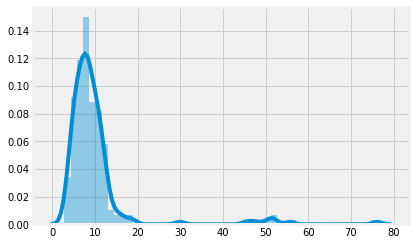

In [52]:
#   volume_sold - Skewed left
volume_sold_list = df.iloc[:, 0].tolist()
sns.distplot(volume_sold_list, kde=True, rug=False)
plt.show()

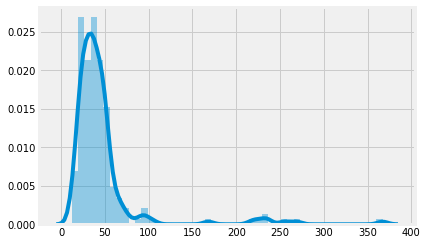

In [62]:
#  2015_margin - Skewed left
_2015_margin_list = df.iloc[:, 1].tolist()
sns.distplot(_2015_margin_list, kde=True, rug=False)
plt.show()

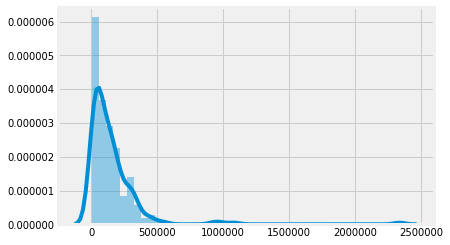

In [65]:
#  2015_q1_sales - Skewed left
_2015_q1_sales_list = df.iloc[:,2].tolist()
sns.distplot(_2015_q1_sales_list, kde=True, rug=False)
plt.show()

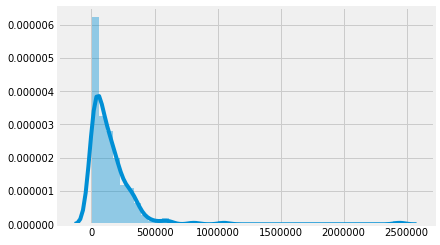

In [66]:
#  2016_q1_sales - Skewed left
_2016_q1_sales_list = df.iloc[:,3].tolist()
sns.distplot(_2016_q1_sales_list, kde=True, rug=False)
plt.show()

In [67]:
# Other analysis
df.corr()

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
volume_sold,1.000000,0.988347,0.583403,-0.019402
2015_margin,0.988347,1.000000,0.636538,-0.018406
2015_q1_sales,0.583403,0.636538,1.000000,-0.001544
2016_q1_sales,-0.019402,-0.018406,-0.001544,1.000000


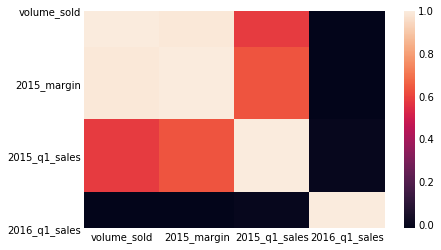

In [95]:
sns.heatmap(df.corr())

---

### An aside on plotting and visual elements..

Check out this example:

```python
   1.  sns.set(rc={"figure.figsize": (10, 7)})
   2.  sns.set_style("white")
   3.  dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
   4.  dist.set_title("I'm a fairly cool plot!", fontsize=16)
```

**1.** With Seaborn (the `sns` object in context), the `sns.set()` method with `{"figure.figsize": (10, 7)}` parameter will control the size of the plot based on aspect ratio and scale.<br><br>
**2.** Seaborn comes with a variety of styles.  They can be set using `sns.set_style([The style])`.  There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and ticks. They are each suited to different applications and personal preferences. The default theme is `darkgrid`. <br><br>
**3.** There are plenty of different types of plot types available.  For getting sense of the distribution of your data, `sns.distplot()` is a great choice.  The first paramter `data` is the only required parameter.  The other parameters in our example on line 3, control the visual aesthetics.  You can read more about [controling the visual aesthetics](https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html) of Seaborn.
<br><br>
**4.** Notice on line 3, we've assigned a reference to sns.distplot(), to a variable called `dist`.  In order to control certain visual elements, it's necessary to have a reference to the specific instance that initially references the plotting function. In this case, with the plot refernece to "distplot", it's possible to set the title using `.set_title`.

### 7. [Bonus]:  Explore the `seaborn` gallery

Explore the [Seaborn Gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html), and attempt to adapt 2-3 other plot methods using our `sales_data`.  This should give you a little context and familliarity with some of the most common plotting functions in Seaborn.  

Beyond this we will be diving into `matplotlib`, `pandas`, and other plotting packages.  The best way to get good at data visualization is practicing.  Each package has it's own pitfalls and conventions, but many are just wrappers around matplotlib at a low level so it's possible to use them together.  

Generally, `seaborn` and `pandas` will get you most of the way there, and then using `matplotlib` can help you "tweak" the finer aesthetics of the output.

**Note:** Seaborn does not like to work with lists typically, so you may need to convert your data to an array using ['`np.array()`'](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) in order for Seaborn to accept it